<a href="https://colab.research.google.com/github/hamagami/pycaret/blob/main/pycaret_anomaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyCaretで試す異常検知

pycaretをインストールします。
1,2分かかるかもしれません。途中，他のモジュールとの依存関係についてのエラーがでますが，今回の範囲では問題ありません，

In [1]:
!pip -q install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 65.3 MB/s

GoogleDriveのmount  googledrive上のデータやコードが使えるようにします

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


必要なモジュールをimport しておきます

In [14]:
import pycaret
import pandas as pd
import matplotlib.pyplot as plt

## ここまでで，最低限の準備ができました。ここからPyCaretを実際に動かしていきます

### データの読み込み

まず，データを準備します。独自のデータを使う場合には，googledrive上にファイルをアップロード（もしくはローカルのPCと同期してるのであれば，PCのフォルダに保存）します。ここでは，PyCaretが予め演習用に用意してある様々なデータを使って基本的な動作をみています。
予め演習用に用意してあるデータは　pycaret.datasets というモジュールに含まれているget_data()という関数で確認できます。

In [3]:
from pycaret.datasets import get_data #  これは1度だけ実行すればよい

In [4]:
data_list= get_data()
data_list

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


多くのデータセットがつかえますが，残念ながら，異常検知(AnomalyDetection)タスクのデータは1つしかありません
"Default Task" のカラムに　"Anomaly Detection"とラベル付けされているデータは以下の通りです。データの名称は anomaly となっています。

In [5]:
data_list[data_list["Default Task"]=="Anomaly Detection"] #"Default Task

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N


このデータをダウンロードしてみます。
下記では，dataset という変数(DataFrame形式）にデータが入ります。同時に最初の数行が出力されます。

In [6]:
dataset = get_data("anomaly")

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754


データをみてわかる通り，このデータは Col1, Col2, .... Col10の10次元のデータです。データの行，列の数は shape属性で確認できます。

In [ ]:
dataset.shape  # 1000行10列

(1000, 10)

各属性ごとのデータのばらつきをみておく。どのような分布になっているかを理解していると，後の方針が立てやすい

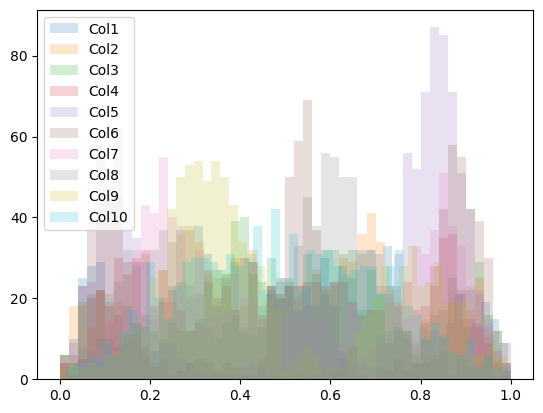

In [ ]:
for item, data in dataset.iteritems(): #１列ずつ取り出す
  plt.hist(data,bins=50,label=item,alpha=0.2)
plt.legend()
plt.show()

### セットアップ

pycaretでは，異常検知の学習を行う前に，よりよく学習をするためのデータの前処理を自動化するしくみがあります。これをsetupといいます。
まず異常検知に関連したモジュールを読みこみます

In [7]:
from pycaret.anomaly import * #これは実行中1回行えばよい

In [8]:
anoexe = setup(dataset,normalize=True) #データの範囲はほぼ0～1に収まっているので特段前処理は必要なさそうだが，念のためnormalize=Trueで正規化をしておく

,Description,Value
0,Session id,8685
1,Original data shape,"(1000, 10)"
2,Transformed data shape,"(1000, 10)"
3,Numeric features,10
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


準備が整ったので，異常検知をためしてみる
どのような異常検知アルゴリズムが使えるかは，models()で確認できます。

In [9]:
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pycaret.internal.patches.pyod.CBLOFForceToDouble
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


## ABOD

モデルの生成

In [10]:
abod_model = create_model('abod')

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

モデルの適用

In [11]:
abod_results = assign_model(abod_model)

結果: Anomaly のカラムが１の場合に異常判定されている。　Anomaly_Scoreは異常度（連続値）の表現

In [12]:
abod_results

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Anomaly,Anomaly_Score
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591,0,-0.001552
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422,0,-0.003928
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600,0,-0.006005
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463,1,-0.000544
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754,0,-0.004212
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.305055,0.656837,0.331665,0.822525,0.907127,0.882276,0.855732,0.584786,0.808640,0.242762,0,-0.248811
996,0.812627,0.864258,0.616604,0.167966,0.811223,0.938071,0.418462,0.472306,0.348347,0.671129,0,-0.045403
997,0.250967,0.138627,0.919703,0.461234,0.886555,0.869888,0.800908,0.530324,0.779433,0.234952,0,-0.034231
998,0.502436,0.936820,0.580062,0.540773,0.151995,0.059452,0.225220,0.242755,0.279385,0.538755,0,-0.183994


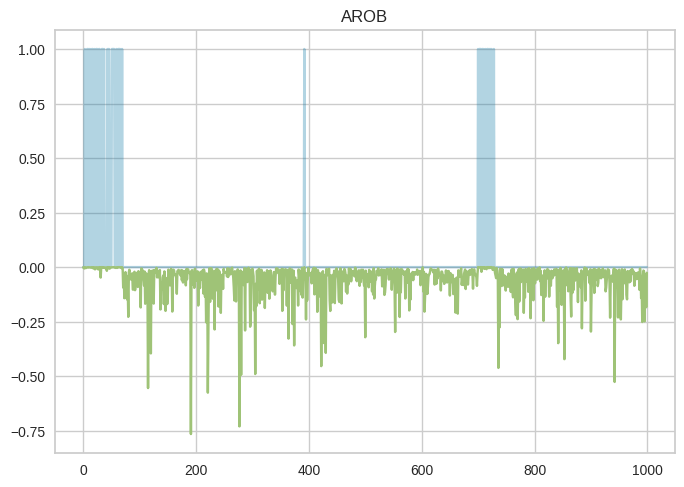

In [17]:
plt.plot(abod_results["Anomaly"],alpha=0.3)
plt.plot(abod_results["Anomaly_Score"])
plt.title("AROB")
plt.show()

## lof

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

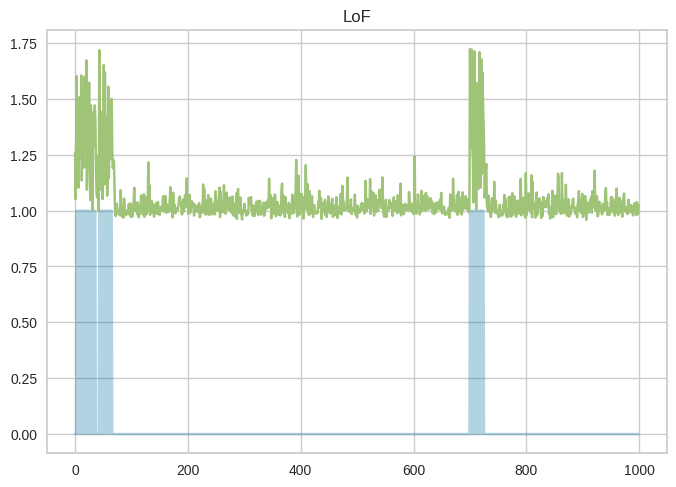

In [18]:
lof_model = create_model('lof')
lof_results = assign_model(lof_model)
plt.plot(lof_results["Anomaly"],alpha=0.3)
plt.plot(lof_results["Anomaly_Score"])
plt.title("LoF")
plt.show()

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

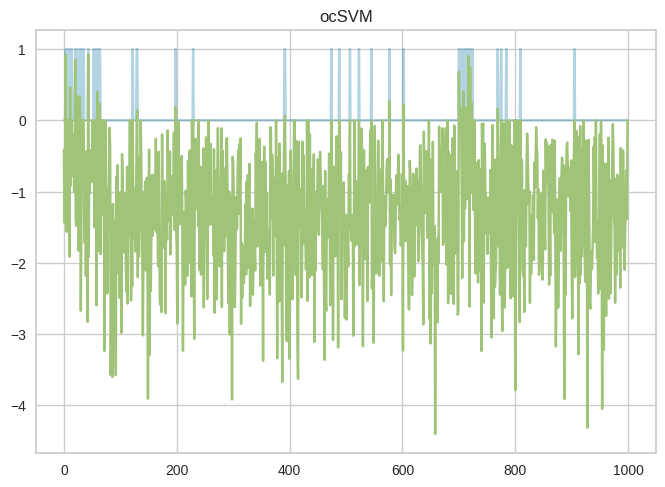

In [19]:
svm_model = create_model('svm',kernel='rbf', nu=0.05)
svm_results = assign_model(svm_model)
plt.plot(svm_results["Anomaly"],alpha=0.3)
plt.plot(svm_results["Anomaly_Score"])
plt.title("ocSVM")
plt.show()

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

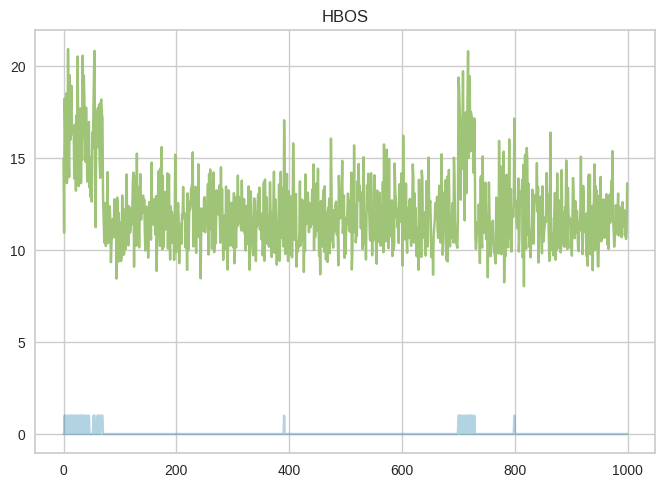

In [20]:
hist_model = create_model('histogram')
hist_results = assign_model(hist_model)
plt.plot(hist_results["Anomaly"],alpha=0.3)
plt.plot(hist_results["Anomaly_Score"])
plt.title("HBOS")
plt.show()